## 💠 **Parte 2: Olist**

**Desafio:** Criar um notebook de análise exploratória (como fizemos na nossa aula de hoje) com todas as etapas de coleta, limpeza, análise e visualização com base de dados da Olist.

**Requisitos:**

    🔸 Formular no mínimo **2 perguntas** (caso queira se desafiar crie pelo menos mais perguntas além das 2 obrigatórias) para responder com suas análises;
    🔸 Utilizar pelo menos **3 bases de dados da Olist** (caso você deseje criar sua base do zero). Caso deseje continuar utilizando a que criamos em aula, é necessário incluir pelo menos mais **1 tabela** para enriquecer sua análise.

**Para responder as perguntas elaboradas usar:**

    🔸 Criar pelo menos **2 gráficos**.
    🔸 Exporte sua base final em csv.
◾ Submeta uma pasta que contenha:
    🔸 o arquivo **seu_nome.ipynb** com sua análise exploratória;
    🔸 a base final criada por você no formato .csv;

**Dicas:**

    🔸 Use os conhecimentos da aula para realizar a análise e as visualizações.
    🔸 Use as funções do Pandas para manipular os dados.
    🔸 Seja criativa e explore os dados para encontrar insights interessantes!

**Boa sorte!**

# Perguntas :
* 1 - Qual o ticket médio diário,mensal e anual?
* 2 - Qual o ano teve o maior número de vendas em valor?
* 3 - Qual estado teve mais vendas?
* 4 - Pedidos cancelados por estado?
* 5 - Qual categoria de produto foi mais vendida?
* 6 - Qual meio de pagamento mais utilizado?

In [1]:
#importando as biblitecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#lendo o arquivo csv df pedidos

df_pedidos = pd.read_csv('../para-sala/dados/olist_orders_dataset.csv')

In [3]:
# lendo o arquivo csv df itens pedido
df_itens_pedido = pd.read_csv('../para-sala/dados/olist_order_items_dataset.csv')

In [4]:
#lendo arquivo csv de pagamento 
df_pgto = pd.read_csv('../para-sala/dados/olist_order_payments_dataset.csv')

In [5]:
#fazendo o filtro do arquvio com apenas as colunas que seram utilizadas
df_pgto = df_pgto[['order_id','payment_type']]
df_pgto = df_pgto.dropna()
df_pgto = df_pgto.reset_index(drop=True)
df_pgto

,order_id,payment_type
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card
3,ba78997921bbcdc1373bb41e913ab953,credit_card
4,42fdf880ba16b47b59251dd489d4441a,credit_card
...,...,...
103881,0406037ad97740d563a178ecc7a2075c,boleto
103882,7b905861d7c825891d6347454ea7863f,credit_card
103883,32609bbb3dd69b3c066a6860554a77bf,credit_card
103884,b8b61059626efa996a60be9bb9320e10,credit_card


In [6]:
#Fazendo o merge para juntar os dfs usando a função merge e inner com base nas colunas 'order_id'
df_olist_pedidos = pd.merge(df_pedidos, df_itens_pedido, on=['order_id'], how='inner')
df_olist_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [7]:
#lendo o arquivo csv df consumidor
df_consumidor = pd.read_csv('../para-sala/dados/olist_customers_dataset.csv')
df_consumidor

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [8]:
# juntando os  dois dfs, com base na colunas'customer_id'.
df_olist_pedidos_uf = pd.merge(df_olist_pedidos, df_consumidor, on=['customer_id'], how='inner')
df_olist_pedidos_uf

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [9]:
#lendo arquivo csv do produtos 
df_produtos = df_produtos = pd.read_csv('../para-sala/dados/olist_products_dataset.csv') 
df_produtos

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [10]:
#Fazendo o filtro do arquivo com apenas as colunas que seram utlizadas
df_produtos = df_produtos[['product_id','product_category_name']]
df_produtos = df_produtos.dropna()
df_produtos = df_produtos.reset_index(drop=True)
df_produtos


,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas
...,...,...
32336,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao
32337,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao
32338,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho
32339,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios


# * Iniciando a limpeza dos dados

In [11]:
# Verificando as informações dos dados
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
# criando uma lista com a colunas que não seram utilizadas e excluindo-as do df
columns_drop = ['order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date']
df_pedidos = df_pedidos.drop(columns_drop, axis=1)
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54


In [13]:
# Verificando os status disponíveis no df
df_pedidos['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [14]:
# Verificando a quantidade de pedidos finalizados
df_pedidos[df_pedidos['order_status'] == 'delivered']

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54


In [15]:
# Verificando a quantidade de  pedidos cancelados
df_pedidos[df_pedidos['order_status'] == 'canceled']



,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,NaN
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,NaN
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,NaN
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN
...,...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,NaN
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,NaN
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN


In [16]:
# Filtrando somente pedidos finalizados, percebemos que perdemos um número razoável de linhas, cerca de 3 mil.
# Agora, com nosso dataset filtrado, precisamos resetar o seu index:
df_pedidos = df_pedidos.reset_index(drop=True)
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54


In [17]:
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_delivered_customer_date  96476 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [18]:
# transformando a colunas de datas que estão como string em datatime: 
df_pedidos['order_purchase_timestamp'] = pd.to_datetime(df_pedidos['order_purchase_timestamp'])
df_pedidos['order_delivered_customer_date'] = pd.to_datetime(df_pedidos['order_delivered_customer_date'])

#Criando a colunas com mês e ano por que iremmos usar para nossa análise
df_pedidos['reference_month_year'] = pd.to_datetime(df_pedidos['order_purchase_timestamp'].dt.strftime('%Y-%m'))
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-07-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-08-01
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-11-01
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-01
...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-02-01
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-08-01
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01-01


In [19]:
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-07-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-08-01
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-11-01
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-01
...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-02-01
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-08-01
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01-01


In [20]:
# verificando o dados df itens pedido
df_itens_pedido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
# Verificando os dados df consumidor
df_consumidor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [22]:
# Excluindo a coluna 'customer_unique_id'
df_consumidor = df_consumidor.drop('customer_unique_id', axis=1)
df_consumidor

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP
...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,92120,canoas,RS


In [23]:
# Por padrão é realizado o merge dos dados com o inner join
# Jutando os df pedidos e itens de pedidos
df_pedidos  = pd.merge(df_pedidos, df_itens_pedido, on='order_id', how='inner')


In [24]:
#juntando os dfs
df_pedidos = pd.merge(df_pedidos, df_produtos, on=['product_id'], how='inner')
df_pgto = pd.merge(df_pgto, df_pedidos, on=['order_id'], how='inner')
df_olist = pd.merge(df_pgto, df_consumidor, on=['customer_id'], how='inner')
df_olist

,order_id,payment_type,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month_year,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-05-09 17:36:51,2018-04-01,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,casa_construcao,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-29 20:32:09,2018-06-01,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,automotivo,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-18 17:24:41,2017-12-01,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,perfumaria,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,credit_card,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-21 01:35:51,2017-12-01,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,cama_mesa_banho,36060,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,credit_card,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-06-01 21:44:53,2018-05-01,1,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88,cama_mesa_banho,18570,conchas,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115898,0406037ad97740d563a178ecc7a2075c,boleto,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-16 13:09:51,2018-03-01,1,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,2018-03-15 03:55:25,297.00,66.31,construcao_ferramentas_iluminacao,12954,atibaia,SP
115899,7b905861d7c825891d6347454ea7863f,credit_card,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-23 22:25:56,2017-08-01,1,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,2017-08-24 10:04:56,79.00,17.80,papelaria,30210,belo horizonte,MG
115900,32609bbb3dd69b3c066a6860554a77bf,credit_card,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,NaT,2017-11-01,1,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2b474132480edac3c,2017-11-27 17:46:05,39.99,7.78,automotivo,1519,sao paulo,SP
115901,b8b61059626efa996a60be9bb9320e10,credit_card,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-21 22:41:46,2018-08-01,1,e9c1abcc7126360336d8f56d49041a8c,679769a98cfcc6da877c8486ff1c13f3,2018-08-13 23:45:00,349.00,20.54,beleza_saude,22733,rio de janeiro,RJ


In [25]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115903 entries, 0 to 115902
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115903 non-null  object        
 1   payment_type                   115903 non-null  object        
 2   customer_id                    115903 non-null  object        
 3   order_status                   115903 non-null  object        
 4   order_purchase_timestamp       115903 non-null  datetime64[ns]
 5   order_delivered_customer_date  113406 non-null  datetime64[ns]
 6   reference_month_year           115903 non-null  datetime64[ns]
 7   order_item_id                  115903 non-null  int64         
 8   product_id                     115903 non-null  object        
 9   seller_id                      115903 non-null  object        
 10  shipping_limit_date            115903 non-null  object        
 11  

In [26]:
# Aqui estamos buscando uma estatística descritiva, podemos utilizar a nossa função describe() para trazer essas informações
df_olist.describe().T

,count,mean,min,25%,50%,75%,max,std
order_purchase_timestamp,115903,2017-12-31 10:55:51.428297984,2016-09-04 21:15:19,2017-09-12 16:05:10.500000,2018-01-19 13:22:28,2018-05-04 19:53:43.500000,2018-09-03 09:06:57,NaN
order_delivered_customer_date,113406,2018-01-14 01:00:38.765726720,2016-10-11 13:46:32,2017-09-25 19:39:41,2018-02-02 16:24:10.500000,2018-05-15 21:30:01,2018-10-17 13:22:46,NaN
reference_month_year,115903,2017-12-16 06:19:20.108021248,2016-09-01 00:00:00,2017-09-01 00:00:00,2018-01-01 00:00:00,2018-05-01 00:00:00,2018-09-01 00:00:00,NaN
order_item_id,115903.0,1.196302,1.0,1.0,1.0,1.0,21.0,0.699505
price,115903.0,120.947333,0.85,39.9,74.9,134.9,6735.0,184.260929
freight_value,115903.0,20.075493,0.0,13.08,16.32,21.22,409.68,15.869972
customer_zip_code_prefix,115903.0,35052.624022,1003.0,11320.0,24315.0,58540.0,99980.0,29813.124839


In [27]:
# Exportando a base final em csv
df_olist.to_csv('Base_final_2_olist.csv',index=False)

# Perguntas :
* 1 - Qual o ticket médio diário,mensal e anual?
* 2 - Qual o ano teve o maior número de vendas em valor?
* 3 - Qual estado teve mais vendas?
* 4 - Pedidos cancelados por estado?
* 5 - Qual categoria de produto foi mais vendida?
* 6 - Qual meio de pagamento mais utilizado?


# 1 - Qual o ticket médio diário,mensal e anual?

In [28]:
#Verificando o ticket médio diário
ticket_médio_diario = df_olist['reference_month_year'].dt.day
ticket_médio_diario = df_olist.groupby(ticket_médio_diario)['price'].mean()
ticket_médio_diario

reference_month_year
1    120.947333
Name: price, dtype: float64

In [29]:
#verificando o ticket média mensal
mes_filter = df_olist['reference_month_year'].dt.month
ticket_médio_mensal = df_olist.groupby(mes_filter)['price'].mean()
ticket_médio_mensal



reference_month_year
1     116.991634
2     114.157885
3     121.319260
4     128.034790
5     125.315048
6     122.189534
7     120.347411
8     118.079050
9     130.497065
10    123.191941
11    116.103036
12    117.558479
Name: price, dtype: float64

In [30]:
#verificando o ticket média anual
ticket_médio_anual = df_olist['reference_month_year'].dt.year
ticket_médio_anual = df_olist.groupby(ticket_médio_anual)['price'].mean()
ticket_médio_anual


reference_month_year
2016    133.210522
2017    121.191505
2018    120.668878
Name: price, dtype: float64

# 2 - Qual o ano teve o maior número de vendas em valor?

In [31]:
# Verificando total de vendas por ano para verificar o ano com mais vendas
vendas_anual = df_olist['reference_month_year'].dt.year
total_vendas_anual = df_olist.groupby(vendas_anual)['price'].sum()
total_vendas_anual


reference_month_year
2016      51019.63
2017    6370067.89
2018    7597071.23
Name: price, dtype: float64

C:\Users\Ellen\AppData\Local\Temp\ipykernel_2772\2906726191.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_olist,


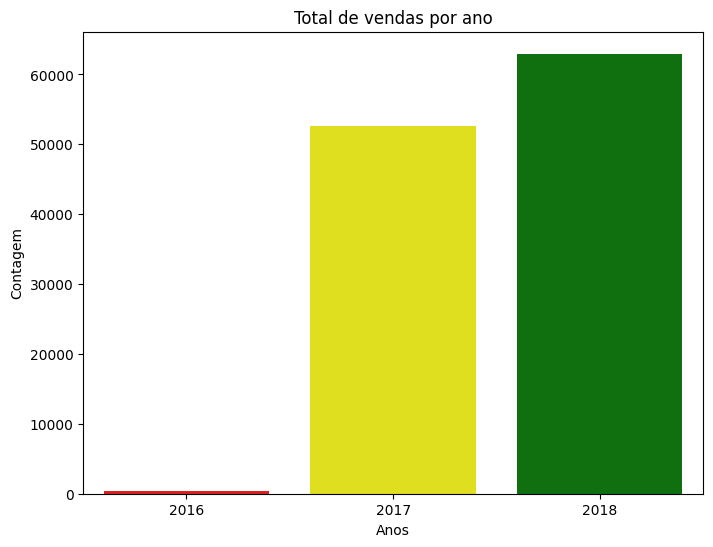

In [32]:
# definir tamanho da figura
plt.figure(figsize=(8, 6))

# definindo uma lista de cores para o gráfico
cores = ['red', 'yellow', 'green']
# instanciar o tipo de plotagem, no caso, um countplot usando x como os anos
sns.countplot(data = df_olist,
              x = vendas_anual,
              palette=cores)

# definir texto do título e eixos x e y
plt.title('Total de vendas por ano')
plt.xlabel('Anos')
plt.ylabel('Contagem')
plt.show()

# 3 - Qual o estado teve mais vendas?

In [33]:
#Verificando os estados
df_olist['customer_state'].unique()

array(['MG', 'SP', 'PB', 'ES', 'RS', 'PA', 'SC', 'GO', 'PR', 'CE', 'RN',
       'TO', 'RJ', 'SE', 'PE', 'AM', 'DF', 'MA', 'AL', 'MT', 'BA', 'RO',
       'PI', 'RR', 'MS', 'AP', 'AC'], dtype=object)

In [34]:
# verificando em qual estado teve mais vendas
regiao = df_olist['customer_state'].mode()
regiao


0    SP
Name: customer_state, dtype: object

In [35]:
# Filtrando as vendas finalizadas
vendas_finalizadas = df_olist[df_olist['order_status'] == 'delivered']

# Agrupando as vendas finalizadas por estado e contando a quantidade de vendas finalizadas
venda_regiao = vendas_finalizadas.groupby('customer_state').size().reset_index(name='total_vendas')

venda_regiao



,customer_state,total_vendas
0,AC,92
1,AL,437
2,AM,167
3,AP,83
4,BA,3859
5,CE,1483
6,DF,2389
7,ES,2288
8,GO,2319
9,MA,809


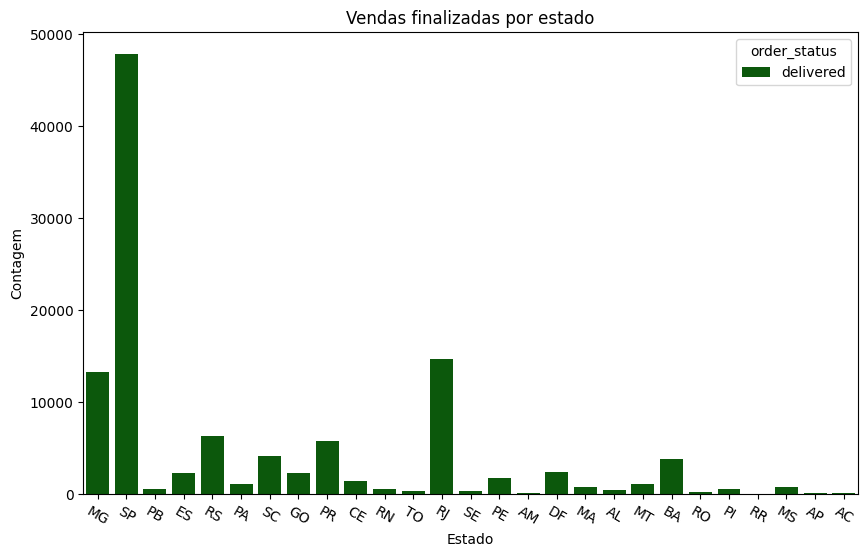

In [36]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem, no caso, um countplot usando x como os tipos status do pedido e estado
sns.countplot(data = vendas_finalizadas,
              x = 'customer_state', 
              hue = 'order_status',
              palette=['#006400'])

# como o texto do eixo x é longo, podemos rotacioná-lo para melhorar a visualização
plt.xticks(rotation=330)

# definir texto do título e eixos x e y

plt.title('Vendas finalizadas por estado')
plt.xlabel('Estado')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'order_status')


plt.show()

# 4 - Pedidos cancelados por estado?

In [37]:
# Filtrando os pedidos cancelados
vendas_canceladas = df_olist[df_olist['order_status'] == 'canceled']

# Agrupa as vendas finalizadas por estado e o status do pedido
venda_canceladas_região = vendas_canceladas.groupby('customer_state').size().reset_index(name='total_vendas')

venda_canceladas_região


,customer_state,total_vendas
0,BA,15
1,CE,4
2,DF,9
3,ES,8
4,GO,11
5,MA,4
6,MG,58
7,MS,1
8,MT,1
9,PA,1


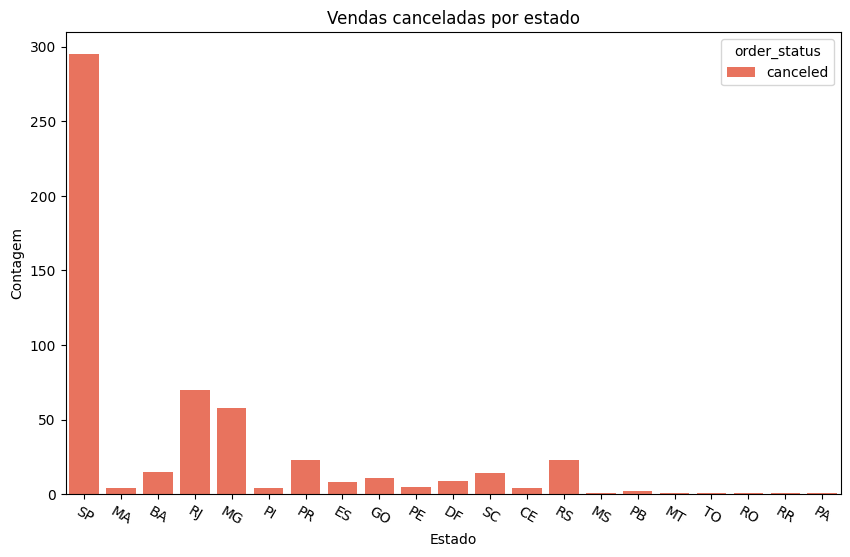

In [38]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem, no caso, um countplot usando x como os tipos status do pedido e estado

sns.countplot(data = vendas_canceladas,
              x = 'customer_state', 
              hue = 'order_status',
            palette=['#FF6347'])

# como o texto do eixo x é longo, podemos rotacioná-lo para melhorar a visualização
plt.xticks(rotation=330)

# definir texto do título e eixos x e y

plt.title('Vendas canceladas por estado')
plt.xlabel('Estado')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title='order_status')

plt.show()

# 5 - Qual categoria de produto foi mais vendida?


In [39]:
# Filtrando somente vendas finalizadas
pedidos_finalizados = df_olist[df_olist['order_status'] == 'delivered']

# Usando a função valeu_counts()) para verificar qual a categoria mais vendida e normalizando o resultado para porcentagem
categoria_mais_vendido = pedidos_finalizados['product_category_name'].value_counts(normalize=True)
categoria_mais_vendido

product_category_name
cama_mesa_banho                                  0.102727
beleza_saude                                     0.086053
esporte_lazer                                    0.077006
moveis_decoracao                                 0.075454
informatica_acessorios                           0.069643
                                                   ...   
portateis_cozinha_e_preparadores_de_alimentos    0.000123
cds_dvds_musicais                                0.000123
pc_gamer                                         0.000079
fashion_roupa_infanto_juvenil                    0.000062
seguros_e_servicos                               0.000018
Name: proportion, Length: 73, dtype: float64

# 6 - Qual meio de pagamento mais utilizado?

In [40]:
# Verificando o id do vendedor com mais vendas usando a função mode()
meio_de_pagamento = df_olist['payment_type'].value_counts(normalize=True)
meio_de_pagamento

payment_type
credit_card    0.737996
boleto         0.194551
voucher        0.053113
debit_card     0.014340
Name: proportion, dtype: float64

C:\Users\Ellen\AppData\Local\Temp\ipykernel_2772\581438869.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_olist,


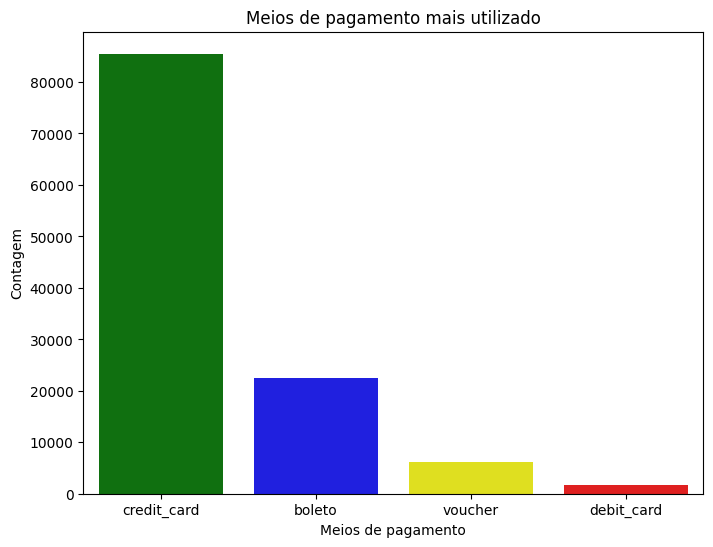

In [41]:
# definir tamanho da figura
plt.figure(figsize=(8, 6))

# definindo uma lista de cores para o gráfico
cores = ['green','blue','yellow','red']
# instanciar o tipo de plotagem, no caso, um countplot usando x como os meios de pagamentp
sns.countplot(data = df_olist,
              x ='payment_type',
              palette=cores)

# definir texto do título e eixos x e y
plt.title('Meios de pagamento mais utilizado')
plt.xlabel('Meios de pagamento')
plt.ylabel('Contagem')
plt.show()